In [1]:
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf

In [3]:
tf.enable_eager_execution()

In [ ]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos ]
print(get_available_gpus())

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

In [ ]:
x = [[2.]]
m = tf.matmul(x,x)
print("hello, {}".format(m))
a = tf.constant([[1,2],
                [3,4]])
print(a)
b = tf.add(a,1)
print(b)
print(a*b)
import numpy as np
c = np.multiply(a,b)
print(c)
print(a.numpy())
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1
fizzbuzz(15)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(784,)),
    tf.keras.layers.Dense(10)
])

class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(units=10)
    self.dense2 = tf.keras.layers.Dense(units=10)

  def call(self, input):
    """Run the model."""
    result = self.dense1(input)
    result = self.dense2(result)
    result = self.dense2(result)  # reuse variables from dense2 layer
    return result

model = MNISTModel()

w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
    loss =w*w
grad = tape.gradient(loss,w)
print(grad)

In [4]:
with tf.device('/device:GPU:0'):
    # Build the model
    optimizer = tf.train.AdamOptimizer()
    mnist_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
      tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(10)
    ])

    #Fetch and format the mnist data
    (mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices(
      (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
       tf.cast(mnist_labels,tf.int64)))
    dataset = dataset.shuffle(1000).batch(32)
    loss_history = []
    for (batch, (images, labels)) in enumerate(dataset.take(400)):
      if batch % 10 == 0:
        print('.', end='')
      with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True)
        loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

      loss_history.append(loss_value.numpy())
      grads = tape.gradient(loss_value, mnist_model.variables)
      optimizer.apply_gradients(zip(grads, mnist_model.variables),
                                global_step=tf.train.get_or_create_global_step())

........................................

Text(0, 0.5, 'Loss [entropy]')

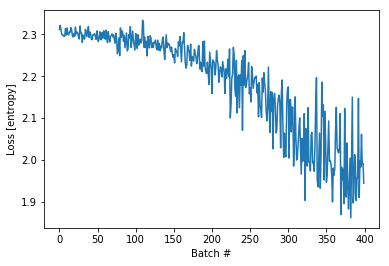

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [ ]:
for images, labels in dataset.take(1):
    print("Logits: ", mnist_model(images[0:1]).numpy())

In [ ]:
Text(0, 0.5, 'Loss [entropy]')